# Perceptron

Dieses Projekt ist eine Implementierung eines Perceptrons. Ein Perceptron ist ein einfacher, linearer Klassifikator, der Datenpunkte in zwei Klassen einteilen kann. Er basiert auf der Idee, dass die Daten durch eine lineare Entscheidungsgrenze (z. B. eine gerade Linie in 2D) getrennt werden können.

## Berechnung der Ausgabewerte

Mit einem Bias $b$, den Eingaben $x_i$ und den Gewichten $w_{ij}$ berechnen sich die Ausgabewerte $o_j$ zu:

$$
o_j =
\begin{cases}
1 & \text{wenn } \sum_i w_{ij} x_i + b > 0 \\
0 & \text{ansonsten}
\end{cases}
$$

## Lernregeln

Für das Training des Perceptrons, ergeben sich folgende Lernregeln:

1. Ist der Output gleich dem gewollten Ergebniss, wird die Gewichtung nicht verändert
2. Ist die Ausgabe 0 aber soll den Wert 1 annehmen, werden die Gewichte inkrementiert
3. Ist die Ausgabe 1, soll aber den Wert 0 annehmen, dann werden die Gewichte dekrementiert

Mathematisch wird der Sachverhalt folgendermaßen ausgedrückt:

$$
w_{ij}^{\text{neu}} = w_{ij}^{\text{alt}} + \Delta w_{ij},
$$

$$
\Delta w_{ij} = \alpha \cdot (t_j - o_j) \cdot x_i.
$$

Dabei ist:

- $\Delta w_{ij}$ die Änderung des Gewichts $w_{ij}$ für die Verbindung zwischen der Eingabezelle $i$ und Ausgabezelle $j$,
- $t_j$ die gewünschte Ausgabe des Neurons $j$,
- $o_j$ die tatsächliche Ausgabe,
- $x_i$ die Eingabe des Neurons $i$ und
- $\alpha > 0$ die Lernrate.

### Gewichtsanpassung im Schritt $k$

Eine Gewichtsaktualisierung im Schritt $k$ verläuft danach wie folgt:

1. $w_{ij}(k + 1) = w_{ij}(k)$ bei korrekter Ausgabe,
2. $w_{ij}(k + 1) = w_{ij}(k) + \alpha x_i$ bei Ausgabe 0 und gewünschter Ausgabe 1 und
3. $w_{ij}(k + 1) = w_{ij}(k) - \alpha x_i$ bei Ausgabe 1 und gewünschter Ausgabe 0.


Eine Implementierung in Python könnte so aussehen:

In [16]:
import numpy as np

class Perceptron:
    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Konstruktor: Initialisiert die Gewichte, den Bias und die Lernrate.
        :param n_inputs: Anzahl der Eingabe-Features
        :param learning_rate: Lernrate (default: 0.1)
        """
        self.weights = np.zeros(n_inputs)  # Gewichte werden mit 0 initialisiert
        self.bias = 0.0  # Bias wird mit 0 initialisiert
        self.learning_rate = learning_rate

    def activate(self, x):
        """
        Heaviside-Aktivierungsfunktion.
        :param x: Eingabewert
        :return: 1, wenn x > 0, sonst 0
        """
        return 1 if x > 0 else 0

    def predict(self, inputs):
        """
        Berechnet die Vorhersage basierend auf den Eingaben.
        :param inputs: Eingabe-Features (Liste oder NumPy-Array)
        :return: 1 oder 0 (Vorhersage)
        """
        if len(inputs) != len(self.weights):
            raise ValueError("Eingabedimension stimmt nicht mit der Anzahl der Gewichte überein!")

        # Berechnung der gewichteten Summe
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activate(weighted_sum)

    def train(self, inputs, target):
        """
        Trainiert den Perceptron mit einem einzelnen Trainingsbeispiel.
        :param inputs: Eingabe-Features (Liste oder NumPy-Array)
        :param target: Zielwert (1 oder 0)
        """
        prediction = self.predict(inputs)
        error = target - prediction

        # Logging: Zeige den Fehler und die Aktion
        print(f"    Inputs: {inputs}, Target: {target}, Prediction: {prediction}, Error: {error}")

        # Wenn ein Fehler vorliegt, aktualisiere die Gewichte und den Bias
        if error != 0:
            # Logge, ob die Gewichte erhöht oder verringert werden
            if error > 0:
                print("    Error > 0: Incrementing weights and bias.")
            else:
                print("    Error < 0: Decrementing weights and bias.")

            # Aktualisiere die Gewichte und den Bias
            self.weights += self.learning_rate * error * np.array(inputs)
            self.bias += self.learning_rate * error

            # Logge die neuen Werte der Gewichte und des Bias
            print(f"    Updated Weights: {self.weights}, Updated Bias: {self.bias}")
        else:
            print("    No error: Weights and bias remain unchanged.")


if __name__ == "__main__":
    # Initialisiere den Perceptron mit 2 Inputs
    p = Perceptron(2)

    # Trainingsdaten
    training_inputs = [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]
    training_outputs = [0, 0, 0, 1]  # Zielwerte (AND)

    # Training des Perzeptrons
    for epoch in range(8):  # 8 Epochen
        print(f"Epoch {epoch + 1}:")
        for inputs, target in zip(training_inputs, training_outputs):
            p.train(inputs, target)

        # Ausgabe der Gewichte und des Bias nach jeder Epoche
        print(f"  Weights after epoch {epoch + 1}: {p.weights}")
        print(f"  Bias after epoch {epoch + 1}: {p.bias}")
        print("-" * 30)  # Trennlinie für bessere Lesbarkeit

    # Teste den Perceptron
    print("Testing the Perceptron:")
    for inputs in training_inputs:
        print(f"{inputs[0]} AND {inputs[1]} = {p.predict(inputs)}")

    # Ausgabe der Gewichte und des Bias
    print("Final Weights:", p.weights)
    print("Final Bias:", p.bias)


Epoch 1:
    Inputs: [0, 0], Target: 0, Prediction: 0, Error: 0
    No error: Weights and bias remain unchanged.
    Inputs: [0, 1], Target: 0, Prediction: 0, Error: 0
    No error: Weights and bias remain unchanged.
    Inputs: [1, 0], Target: 0, Prediction: 0, Error: 0
    No error: Weights and bias remain unchanged.
    Inputs: [1, 1], Target: 1, Prediction: 0, Error: 1
    Error > 0: Incrementing weights and bias.
    Updated Weights: [0.1 0.1], Updated Bias: 0.1
  Weights after epoch 1: [0.1 0.1]
  Bias after epoch 1: 0.1
------------------------------
Epoch 2:
    Inputs: [0, 0], Target: 0, Prediction: 1, Error: -1
    Error < 0: Decrementing weights and bias.
    Updated Weights: [0.1 0.1], Updated Bias: 0.0
    Inputs: [0, 1], Target: 0, Prediction: 1, Error: -1
    Error < 0: Decrementing weights and bias.
    Updated Weights: [0.1 0. ], Updated Bias: -0.1
    Inputs: [1, 0], Target: 0, Prediction: 0, Error: 0
    No error: Weights and bias remain unchanged.
    Inputs: [1, 1]

### AND-Gatter Darstellung

Wir trainieren unser Perceptron auf das AND-Gatter und bekommen folgende Gewichtungen und Bias:

$w_1 = 0.2, w_2 = 0.1$

$b$ = -0.2

Wie bereits gezeigt kann die Entscheidungsgrenze für das AND-Gatter kann durch die folgende Gleichung dargestellt werden:

$$ \sum_i w_{ij} x_i + b = 0$$

also in unserem Fall:

$$
0.2x_1 + 0.1x_2 - 0.2
$$

unter Auflösung nach $x_1$ bekommen wir folgende Lösung:

$$x_1 = -0.5x_2 + 1$$

unter Auflösung von $x_2$:

$$x_2 = -2x_1 + 2$$

Führe die nächste Zelle aus um die Graphen zu visualisieren.


In [8]:
from IPython.display import display, HTML

iframe_code = """
<div style="display: flex; justify-content: center;">
    <iframe src="https://www.desmos.com/calculator/vjfoyxwyr5?lang=de"
            width="1000" height="500" style="border:0;"></iframe>
</div>
"""
display(HTML(iframe_code))


Wir sehen, das unsere Punkte die einen 0 Output liefern sollen [(0, 0), (0, 1), (1,0)], jeweils unter oder auf unseren Graphen liegen. Lediglich unser 1 Output [(1, 1)] liegt über dem Graphen.

## Das XOR Problem

Versuchen wir unser Pereptron mit dem XOR-Problem zu trainieren:

```python
training_outputs = [0, 1, 1, 0]  # Zielwerte (XOR)
```

so fällt auf, das der Output ein falsches Ergebnis liefert:

```bash
0 AND 0 = 1
0 AND 1 = 1
1 AND 0 = 0
1 AND 1 = 0
```

Das liegt daran, dass die Wahrheitstabelle eines XOR-Gatters nicht linear separabel ist. Es gibt keine graphische Lösung, welche die Punkte [(0,0), (1,1)] inkludiert und gleichzeitig die Punkte [(0,1), (1,0)] exkludiert.

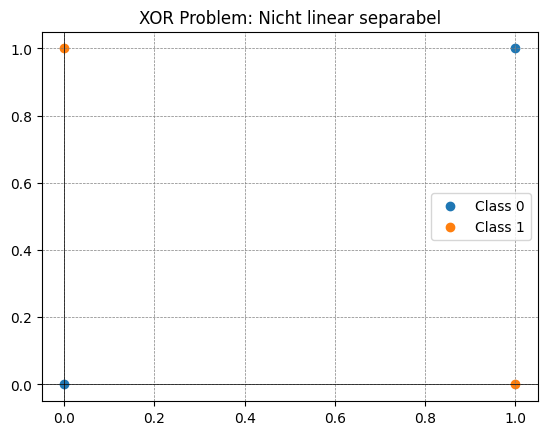

In [17]:
import matplotlib.pyplot as plt

# Punkte für XOR
points = {
    "Class 0": [(0, 0), (1, 1)],
    "Class 1": [(0, 1), (1, 0)]
}

# Plot
for label, pts in points.items():
    x, y = zip(*pts)
    plt.scatter(x, y, label=label)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title("XOR Problem: Nicht linear separabel")
plt.show()


# Mehrlagiges Perzeptron

In [34]:
import numpy as np

class MLP:
    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate=0.1):
        """
        Konstruktor: Initialisiert die Gewichte und Biases für die Schichten.
        :param n_inputs: Anzahl der Eingabe-Features
        :param n_hidden: Anzahl der Neuronen in der versteckten Schicht
        :param n_outputs: Anzahl der Ausgabeneuronen
        :param learning_rate: Lernrate
        """
        # Gewichte und Biases für die versteckte Schicht
        self.hidden_weights = np.random.randn(n_inputs, n_hidden)
        self.hidden_bias = np.zeros(n_hidden)

        # Gewichte und Biases für die Ausgabeschicht
        self.output_weights = np.random.randn(n_hidden, n_outputs)
        self.output_bias = np.zeros(n_outputs)

        self.learning_rate = learning_rate

    def sigmoid(self, x):
        """Sigmoid-Aktivierungsfunktion."""
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Ableitung der Sigmoid-Funktion."""
        return x * (1 - x)

    def forward(self, inputs):
        """
        Vorwärtsdurchlauf: Berechnet die Ausgaben der versteckten und Ausgabeschicht.
        :param inputs: Eingabe-Features
        :return: Ausgabe der Ausgabeschicht
        """
        # Berechnung der versteckten Schicht
        self.hidden_input = np.dot(inputs, self.hidden_weights) + self.hidden_bias
        self.hidden_output = self.sigmoid(self.hidden_input)

        # Berechnung der Ausgabeschicht
        self.output_input = np.dot(self.hidden_output, self.output_weights) + self.output_bias
        self.output_output = self.sigmoid(self.output_input)

        return self.output_output

    def backward(self, inputs, target, output):
      """
      Rückwärtsdurchlauf: Berechnet die Fehler und aktualisiert die Gewichte und Biases.
      :param inputs: Eingabe-Features
      :param target: Zielwert
      :param output: Ausgabe des Netzwerks
      """
      # Fehler in der Ausgabeschicht
      output_error = target - output
      output_delta = output_error * self.sigmoid_derivative(output)

      # Fehler in der versteckten Schicht
      hidden_error = np.dot(output_delta, self.output_weights.T)
      hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

      # Aktualisierung der Gewichte und Biases
      self.output_weights += self.learning_rate * np.dot(self.hidden_output.T, output_delta)
      self.output_bias += self.learning_rate * output_delta.flatten()  # Korrektur hier

      self.hidden_weights += self.learning_rate * np.dot(inputs.T, hidden_delta)
      self.hidden_bias += self.learning_rate * hidden_delta.flatten()  # Korrektur hier


    def train(self, inputs, targets, epochs):
        """
        Trainiert das Netzwerk über mehrere Epochen.
        :param inputs: Eingabedaten
        :param targets: Zielwerte
        :param epochs: Anzahl der Epochen
        """
        for epoch in range(epochs):
            for x, y in zip(inputs, targets):
                x = np.array(x, ndmin=2)  # Eingabe in 2D-Form bringen
                y = np.array(y, ndmin=2)  # Zielwert in 2D-Form bringen

                output = self.forward(x)
                self.backward(x, y, output)

            # Ausgabe des Fehlers nach jeder Epoche
            if (epoch + 1) % 1000 == 0 or epoch == 0:
                loss = np.mean((targets - self.forward(inputs)) ** 2)
                print(f"Epoch {epoch + 1}, Loss: {loss}")

    def predict(self, inputs):
        """
        Gibt die Vorhersage des Netzwerks zurück.
        :param inputs: Eingabedaten
        :return: Vorhersage
        """
        output = self.forward(inputs)
        return np.round(output)  # Rundet die Ausgabe auf 0 oder 1

# XOR-Problem
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

targets = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Initialisiere das MLP
mlp = MLP(n_inputs=2, n_hidden=2, n_outputs=1, learning_rate=0.1)

# Trainiere das MLP
mlp.train(inputs, targets, epochs=10000)

# Teste das MLP
print("Testing the MLP on XOR problem:")
for x, y in zip(inputs, targets):
    prediction = mlp.predict(np.array(x, ndmin=2))
    print(f"Input: {x}, Target: {y}, Prediction: {prediction}")


Epoch 1, Loss: 0.34544039613721533
Epoch 1000, Loss: 0.2283334480574376
Epoch 2000, Loss: 0.08685038606402877
Epoch 3000, Loss: 0.02031178645366219
Epoch 4000, Loss: 0.009678377316419568
Epoch 5000, Loss: 0.006092021607732972
Epoch 6000, Loss: 0.004371668318568557
Epoch 7000, Loss: 0.0033804619314050004
Epoch 8000, Loss: 0.0027421994835548887
Epoch 9000, Loss: 0.002299463631681019
Epoch 10000, Loss: 0.001975583433357646
Testing the MLP on XOR problem:
Input: [0 0], Target: [0], Prediction: [[0.]]
Input: [0 1], Target: [1], Prediction: [[1.]]
Input: [1 0], Target: [1], Prediction: [[1.]]
Input: [1 1], Target: [0], Prediction: [[0.]]
